# MNIST Image Classification

MNIST ("Modified National Institute of Standards and Technology") is the de facto “Hello World” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this classification, we aim to correctly identify digits from a dataset of tens of thousands of handwritten images.

# Import the Libraries

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

## Loading the Dataset from TorchVision

In [2]:
from torchvision import datasets, transforms
transform = transforms.ToTensor()

In [3]:
train_data = datasets.MNIST(root='', train=True, download=True, transform=transform)
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data = datasets.MNIST(root='', train=False, download=True, transform=transform)
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: 
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
image, label = train_data[0]
print('Shape:', image.shape, '\nLabel:', label)

Shape: torch.Size([1, 28, 28]) 
Label: 5


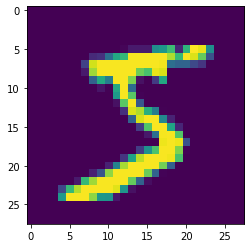

In [6]:
plt.imshow(train_data[0][0].reshape(28,28))

# Data Loading Strategy

As there are more than 30k rows its not wise to feed all the data once into the ANN model. Instead we will try to feed the data in batches to the model using Dataset and DataLoader feature of Torch library

In [7]:
from torch.utils.data import TensorDataset, DataLoader

In [8]:
#Initializing a dataloader object which splits the training dataset into small batches of 500 records each
#and this can be used later in the ANN model training 
torch.manual_seed(101)
train_loader = DataLoader(train_data,batch_size=500,shuffle=True)
test_loader = DataLoader(test_data,batch_size=500,shuffle=True)

# Define the ANN Model

In [9]:
class SimpleANN(nn.Module):
    
    def __init__(self,inp=784, op=10, layers=[120,90] ):
        
        super().__init__()
        self.layer1 = nn.Linear(inp,layers[0])
        self.layer2 = nn.Linear(layers[0],layers[1])
        self.layer3 = nn.Linear(layers[1],op)
        
    def forward(self,x):
        
        x= F.relu(self.layer1(x))
        x= F.relu(self.layer2(x))
        x= F.softmax(self.layer3(x),dim=1) #multiclass classificaiton
        
        return x
    

In [10]:
torch.manual_seed(101)
model = SimpleANN()
model

SimpleANN(
  (layer1): Linear(in_features=784, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=90, bias=True)
  (layer3): Linear(in_features=90, out_features=10, bias=True)
)

# Define Loss and Optimizer

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

# Training the ANN Model

In [12]:
epochs = 20
train_loss= []
test_loss= []
train_acc=[]
test_acc = []

print(f'\nArtificial Neural Network Model Metrics:\n')
for i in range(epochs):
    
    train_crt_pred = 0
    test_crt_pred = 0
    
    for b,(x_train,y_train) in enumerate (train_loader):
        b += 1
        y_pred = model.forward(x_train.view(500,-1))
        loss= criterion(y_pred,y_train)
        
        buffer = torch.max(y_pred.data, 1) [1]
        batch_acc = (buffer == y_train).sum()
        train_crt_pred +=  batch_acc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
                
        if b%30 == 0:
            print(f'Epoch{i:2} Batch {b:4} loss: {loss.item():5.2f} Train Accuracy: {train_crt_pred.item()*100/(500*b):6.3f}%')
    
    train_loss.append(loss)
    train_acc.append(train_crt_pred)
    
    
    with torch.no_grad():
        for b,(x_test,y_test) in enumerate (test_loader):
            b += 1
            y_eval = model.forward(x_test.view(500,-1))
            loss= criterion(y_eval,y_test)
            buffer1 = torch.max(y_eval.data, 1) [1]
            batch_acc = (buffer1 == y_test).sum()
            test_crt_pred +=  batch_acc
    
    test_loss.append(loss)
    test_acc.append(test_crt_pred)

    print(f'After {i+1} Epoch the Train Accuracy is {(train_crt_pred.item()/60000)*100:6.3f}% and Test Accuracy is {(test_crt_pred.item()/10000)*100:6.3f}% \n')     
    
        


Artificial Neural Network Model Metrics:

Epoch 0 Batch   30 loss:  1.94 Train Accuracy: 42.420%
Epoch 0 Batch   60 loss:  1.71 Train Accuracy: 57.083%
Epoch 0 Batch   90 loss:  1.71 Train Accuracy: 65.042%
Epoch 0 Batch  120 loss:  1.64 Train Accuracy: 69.450%
After 1 Epoch the Train Accuracy is 69.450% and Test Accuracy is 83.580% 

Epoch 1 Batch   30 loss:  1.64 Train Accuracy: 83.167%
Epoch 1 Batch   60 loss:  1.64 Train Accuracy: 83.580%
Epoch 1 Batch   90 loss:  1.63 Train Accuracy: 83.680%
Epoch 1 Batch  120 loss:  1.62 Train Accuracy: 83.778%
After 2 Epoch the Train Accuracy is 83.778% and Test Accuracy is 84.620% 

Epoch 2 Batch   30 loss:  1.64 Train Accuracy: 84.667%
Epoch 2 Batch   60 loss:  1.62 Train Accuracy: 84.743%
Epoch 2 Batch   90 loss:  1.63 Train Accuracy: 84.727%
Epoch 2 Batch  120 loss:  1.64 Train Accuracy: 84.705%
After 3 Epoch the Train Accuracy is 84.705% and Test Accuracy is 84.780% 

Epoch 3 Batch   30 loss:  1.61 Train Accuracy: 85.473%
Epoch 3 Batch   6

# Accuracy Visualization

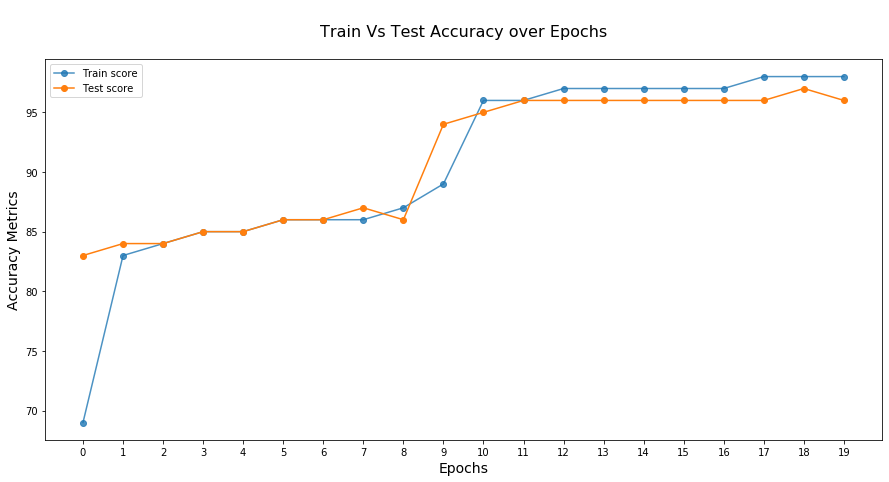

In [44]:
plt.figure(figsize=(15,7))
plt.plot([t/600 for t in train_acc], label='Train score',marker='o',alpha=0.8)
plt.plot([t/100 for t in test_acc], label='Test score',marker='o')
plt.title('\nTrain Vs Test Accuracy over Epochs\n',fontsize=16)
plt.xticks(np.arange(0,20,1));
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Accuracy Metrics',fontsize=14)
plt.legend();

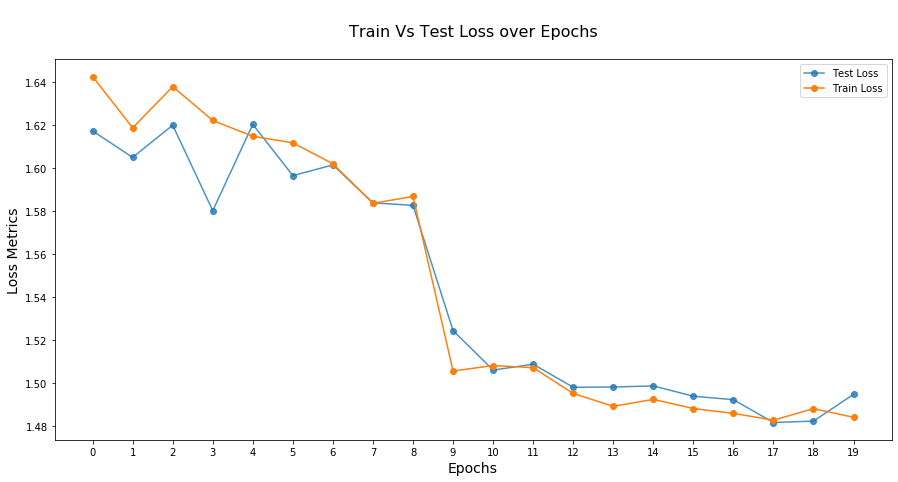

In [45]:
plt.figure(figsize=(15,7))
plt.plot([t for t in test_loss], label='Test Loss',marker='o',alpha=0.8)
plt.plot([t for t in train_loss], label='Train Loss',marker='o')
plt.title('\nTrain Vs Test Loss over Epochs\n',fontsize=16)
plt.xticks(np.arange(0,20,1));
plt.xlabel('Epochs',fontsize=14)
plt.ylabel('Loss Metrics',fontsize=14)
plt.legend();

In [46]:
torch.save(model.state_dict(), 'MNIST_ANN.pt')